# K-Means Clustering

## ===Task===
Your work: Let's modify the above scratch code:
- Modify so it print out the total within-cluster variation. Then try to run several k and identify which k is best.
- Since k-means can be slow due to its pairwise computations, let's implement a mini-batch k-means in which the cluster is create using only partial subset of samples.
- Put everything into a class
---

Done in 14 iterations
Fit and predict time: 0.06533503532409668


Text(0.5, 1.0, 'Final result')

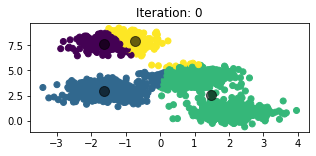

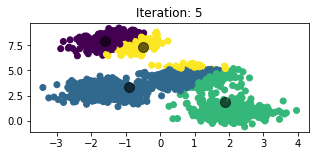

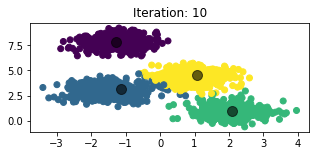

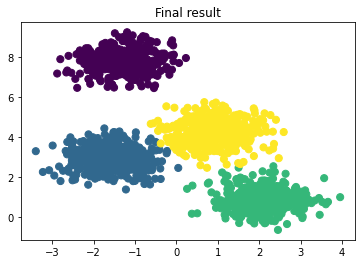

In [1]:
#Implement K-means from scratch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from time import time

X, y_true = make_blobs(n_samples=1500, centers=4,
                       cluster_std=0.60, random_state=0)

def kmeans(X, n_clusters):
    m, n = X.shape

    #1. randomly choose n clusters from X
    #you can also randomly generate any two points
    rng = np.random.RandomState(42)
    i = rng.permutation(m)[:n_clusters]
    centers = X[i]

    iteration = 0

    while True:
        #2. assign lables based on closest center
        #return the index of centers having smallest
        #distance with X
        labels = pairwise_distances_argmin(X, centers)

        #3. find new centers
        new_centers = []
        for i in range(n_clusters):
            new_centers.append(X[labels == i].mean(axis=0))

        #convert list to np.array; you can actually combine #3
        #with np.array in one sentence 
        new_centers = np.array(new_centers)
        
        #plotting purpose
        #plot every 5th iteration to save space
        #remove this if, if you want to see each snapshot
        if (iteration % 5 == 0):
            pred = pairwise_distances_argmin(X, new_centers)
            plt.figure(figsize=(5, 2))
            plt.title(f"Iteration: {iteration}")
            plt.scatter(X[:, 0], X[:, 1], c=pred)
            plt.scatter(new_centers[:, 0], new_centers[:, 1], s=100, c="black", alpha=0.6)

        #4 stopping criteria - if centers do not 
        #change anymore, we stop!
        if(np.allclose(centers, new_centers)):
            break
        else:
            centers = new_centers
            iteration+=1
    
    print(f"Done in {iteration} iterations")
    return centers
        
def predict(X, centers):
    return pairwise_distances_argmin(X, centers)

start = time()
preds = predict(X, kmeans(X, n_clusters=4))
print(f"Fit and predict time: {time() - start}")
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=preds, s=50)
plt.title("Final result")

---
### IMPLEMENT INTO CLASS FROM SCRATCH ABOVE

In [2]:
class Kmeans():

    def __init__(self, k , mini_batch = 0.3, max_iter = 100):

        self.k = k
        self.mini_batch = mini_batch
        self.max_iter = max_iter

    
    def fit(self, X):
        m, n = X.shape

        rng = np.random.RandomState(10)
        i = rng.permutation(m)[: self.k]
        X_batch_size = int(self.mini_batch * len(X))

        self.centers = X[i]

        for iter in np.arange(self.max_iter):
            batch_idx =  np.random.randint(0, len(X), X_batch_size)
            X_batch = X[batch_idx]


            labels = pairwise_distances_argmin(X_batch, self.centers)


            new_centers = []
            for cluster in range(self.k):
                new_centers.append(X_batch[labels == cluster].mean(axis=0))

            new_centers = np.array(new_centers)
            

            #check the distance
            
            if (np.allclose(self.centers, new_centers, rtol = 0.2)) or (iter > self.max_iter):
                break

            else:
                # print(iter)
                self.centers = new_centers


        print(f"The model converges in {iter} iterations")
        labels = pairwise_distances_argmin(X, self.centers) # this last time needs to use entire dataset to reconfirm
        variation_score = np.zeros(self.k)


        #print out the total within-cluster variation

        for cluster in range(self.k):
            cluster_mean = X[labels == cluster].mean(axis = 0)
            within_classs_variation_score = np.sum((X[labels == cluster] - cluster_mean)**2)
            variation_score[cluster] = within_classs_variation_score



        print("Total variation score: ", variation_score.sum())

        self.variation_score = variation_score

    def predict(self, X):
        predicted = pairwise_distances_argmin(X, self.centers)
        return predicted



In [3]:
variation_set = []

for i in range(1, 10):
    print(f"cluster= {i}")
    start = time()
    model = Kmeans(k = i, mini_batch=0.35)
    model.fit(X)
    pred = model.predict(X)
    variation_set.append(model.variation_score)
    print(f"Fit and predict time {time() - start}")
    print()


cluster= 1
The model converges in 15 iterations
Total variation score:  14005.126690305286
Fit and predict time 0.010663509368896484

cluster= 2
The model converges in 1 iterations
Total variation score:  7134.369202181825
Fit and predict time 0.005438804626464844

cluster= 3
The model converges in 2 iterations
Total variation score:  3327.34465289665
Fit and predict time 0.006602287292480469

cluster= 4
The model converges in 7 iterations
Total variation score:  1006.5440417040327
Fit and predict time 0.009326696395874023

cluster= 5
The model converges in 2 iterations
Total variation score:  918.7320192881887
Fit and predict time 0.006718873977661133

cluster= 6
The model converges in 1 iterations
Total variation score:  845.6390762164776
Fit and predict time 0.0069427490234375

cluster= 7
The model converges in 2 iterations
Total variation score:  755.2130362683196
Fit and predict time 0.005952358245849609

cluster= 8
The model converges in 1 iterations
Total variation score:  718.2

In [4]:
variation_set

[array([14005.12669031]),
 array([3176.34729008, 3958.02191211]),
 array([2698.25013999,  364.86280037,  264.23171254]),
 array([246.94182186, 268.53099397, 235.45672238, 255.6145035 ]),
 array([274.91206327,  70.51110357, 235.45672238,  95.30295409,
        242.54917598]),
 array([143.81208179,  45.98458088, 235.45672238, 117.44133127,
         70.96780872, 231.97655117]),
 array([110.57790059,  58.50692114,  51.22281102, 102.81557534,
         88.1978801 , 239.66787637, 104.22407171]),
 array([140.94443425,  51.17539497,  29.83653826, 115.59192463,
         67.25254641, 233.99997123,  30.80172709,  48.60008731]),
 array([142.03559897,  48.6309646 ,  32.83519845, 114.55715028,
         69.64436998, 107.32205518,  36.4648328 ,  40.26229463,
         59.86731773])]

In [5]:
for i, value in enumerate(variation_set):
    print(f"The variation fo {i+1} clusters: {value.var()}")

The variation fo 1 clusters: 0.0
The variation fo 2 clusters: 152753.80368208425
The variation fo 3 clusters: 1264363.1997403319
The variation fo 4 clusters: 146.26841100059318
The variation fo 5 clusters: 7017.475509133539
The variation fo 6 clusters: 5282.35665247784
The variation fo 7 clusters: 3349.922951022755
The variation fo 8 clusters: 4356.087112020987
The variation fo 9 clusters: 1385.0069326618802


Text(4.5, 2200, 'elbow')

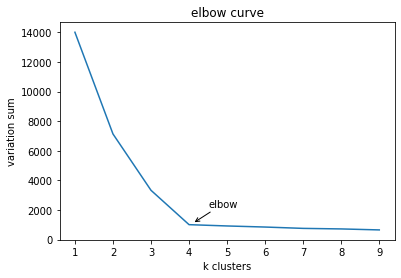

In [6]:
variation_sum = [i.sum() for  i in variation_set]
plt.plot(np.arange(1,10), variation_sum)
plt.ylabel('variation sum')
plt.xlabel('k clusters')
plt.title('elbow curve')

plt.annotate('elbow',xy = (4.1, 1100) ,xytext=(4.5, 2200),  #xytext ---> xy
            arrowprops=dict(arrowstyle="->"))


---
## Summary
- The variation set keeps track of the variation score of each predicted clusters. Looking at each iterations for k, we see that in k=4 ,the variation across 4 clusters seems to be the most balanced, with variance as little as 222 
$$[246.94182186, 268.53099397, 235.45672238, 255.6145035 ]$$ 

- With elbow graph, we reaffirm that the best number of clusters should be 4 as it is the point where sum of variation starts to plateau 
    
